In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
from sklearn.tree import export_graphviz

matplotlib.rc("font", family = "Malgun Gothic")

In [2]:
df_raw = pd.read_csv("Telemarketing_Data_cl3.csv", encoding='utf-8-sig' )
df_raw.head()

,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,56,5,50_group,주부,0,no,결혼,중졸,없음,없음,...,유선전화,261,1,NaN,0,no,0,2018-01-03,87,life
1,57,5,50_group,서비스종사자,1,yes,결혼,전문학교,미확인,없음,...,유선전화,149,1,NaN,0,no,0,2018-01-03,88,life
2,37,3,30_group,서비스종사자,1,yes,결혼,전문학교,없음,대출있음,...,유선전화,226,1,NaN,0,no,0,2018-01-03,89,life
3,40,4,40_group,회사원,1,yes,결혼,검정고시,없음,없음,...,유선전화,151,1,NaN,0,no,0,2018-01-03,90,life
4,56,5,50_group,서비스종사자,1,yes,결혼,전문학교,없음,없음,...,유선전화,307,1,NaN,0,no,0,2018-01-03,91,life


In [3]:
df_raw_20 = df_raw[df_raw["new_age_group"]=="1020_group"]
df_raw_20.head()

,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
8,24,2,1020_group,기술자,1,yes,미혼,석박사,없음,대출있음,...,유선전화,380,1,NaN,0,no,0,2018-01-04,95,life
9,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,대출있음,...,유선전화,50,1,NaN,0,no,0,2018-01-04,96,life
11,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,대출있음,...,유선전화,222,1,NaN,0,no,0,2018-01-05,98,life
12,29,2,1020_group,산업노동자,1,yes,미혼,전문학교,없음,없음,...,유선전화,137,1,NaN,0,no,0,2018-01-05,99,life
59,25,2,1020_group,기술자,1,yes,미혼,대졸학사,없음,대출있음,...,유선전화,174,1,NaN,0,no,0,2018-01-17,146,onlineShopping


In [4]:
df_raw_20 = pd.DataFrame(df_raw_20).reset_index()

In [5]:
df_raw_20.head()

,index,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,8,24,2,1020_group,기술자,1,yes,미혼,석박사,없음,...,유선전화,380,1,NaN,0,no,0,2018-01-04,95,life
1,9,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,...,유선전화,50,1,NaN,0,no,0,2018-01-04,96,life
2,11,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,...,유선전화,222,1,NaN,0,no,0,2018-01-05,98,life
3,12,29,2,1020_group,산업노동자,1,yes,미혼,전문학교,없음,...,유선전화,137,1,NaN,0,no,0,2018-01-05,99,life
4,59,25,2,1020_group,기술자,1,yes,미혼,대졸학사,없음,...,유선전화,174,1,NaN,0,no,0,2018-01-17,146,onlineShopping


In [6]:
y = df_raw_20["success"]
df_X = df_raw_20.drop(["success", "age_group","economic_group","economic_group_dummy", "계약여부", "카드종류", "p_days", "연락일자","index"], axis =1)
X = pd.get_dummies(df_X)

In [7]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))


train data X size : (3968, 47)
train data Y size : (3968,)
test data X size : (1701, 47)
test data Y size : (1701,)


In [9]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]
# learning_rate 학습률 변경 : 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1,10)] # para_lr: [0.1,0.2,0.3,...0,9]
para_depth = [depth for depth in range(1,11)] # *참조: para_depth: [1,2,3,...,10]
para_leaf = [n_leaf*10 for n_leaf in range(1,11)] #


In [10]:
estimator = GradientBoostingClassifier(n_estimators=100, random_state=1234)
#구하고자 하는 parameter와 범위
param_grid = {"learning_rate":para_lr, 
              "max_depth":para_depth, 
              "min_samples_leaf":para_leaf}

#정확도가 높은 최적 parameter 찾기
grid_gb= GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter:\n{}".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

best parameter:
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 60}

best score:
0.858


In [11]:
gb_final = GradientBoostingClassifier(min_samples_leaf=60, max_depth = 4, n_estimators = 100, learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

#train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(gb_final.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
#confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.878

Accuracy on test set: 0.850

Confusion matrix: 
[[1335   74]
 [ 181  111]]


In [14]:
#변수명
v_feature_name = df_train_x.columns

# tree.teature_importances_로 설명 변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = gb_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,importance
1,통화시간,0.546
3,과거통화횟수,0.115
15,직업군_학생,0.073
0,연령,0.041
36,contact_유선전화,0.040
37,contact_휴대폰,0.034
10,직업군_산업노동자,0.032
2,연락시도횟수,0.016
18,결혼여부_미혼,0.014
23,학력_대졸학사,0.012


Text(0, 0.5, 'variables')

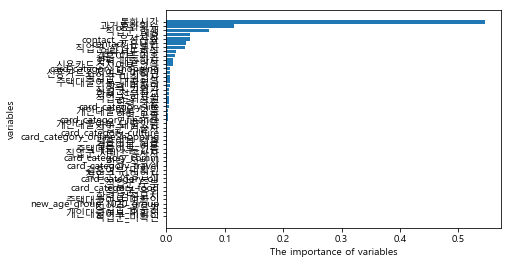

In [15]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("The importance of variables")
plt.ylabel("variables")

In [16]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(df_test_y, y_pred)
cnf_matrix


print("Accuracy:",metrics.accuracy_score(df_test_y, y_pred))
print("Precision:",metrics.precision_score(df_test_y, y_pred))
print("Recall:",metrics.recall_score(df_test_y, y_pred))

Accuracy: 0.8500881834215167
Precision: 0.6
Recall: 0.3801369863013699


In [17]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(df_test_y, y_pred)
cnf_matrix


print("Accuracy:",metrics.accuracy_score(df_test_y, y_pred))
print("Precision:",metrics.precision_score(df_test_y, y_pred))
print("Recall:",metrics.recall_score(df_test_y, y_pred))

Accuracy: 0.8500881834215167
Precision: 0.6
Recall: 0.3801369863013699


Text(0.5, 257.44, 'Predicted label')

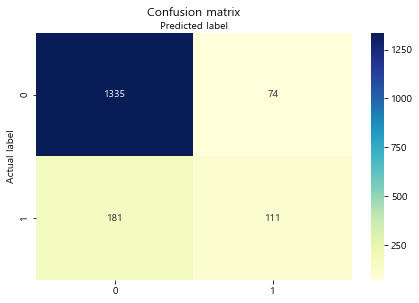

In [18]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')